#Individual Portion Final Project: Climate Change Prediction
Kiejstut Bunikiewicz

The Package Importing and Data Reading and Cleaning Sections are from the Group Project Colab

The Gradient Boosting Model Development is My Individual Work

#Importing Packages

In [125]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

#Reading Data

#### Data Dictionary
Coal_Cons: 10 year average Coal consumption in ExaJoules growth rate %

Coal_Prod: 10 year average Coal Production in ExaJoules growth rate %

Nuke_Cons: 10 year average Nuclear consumption in Terawatt-Hours growth rate %

Nuke_Prod: 10 year average Nuclear production in Terawatt-Hours growth rate %

Natgas_Cons:  10 year average Natgas consumption in ExaJoules growth rate %

Natgas_Prod:10 year average Natgas production in ExaJoules growth rate %

Hydro_Cons: 10 year average Hydro consumption in Terawatt-Hours growth rate %

Hydro_Prod: 10 year average Hydro production in Terawatt-Hours growth rate %

Oil_Cons: 10 year average Oil consumption in 1000s daily barrels growth rate %

Oil_Prod: 10 year average Oil production in 1000s daily barrels growth rate %

Sol_Cons: 10 year average Solar consumption in Terawatt-Hours growth rate %

Sol_Prod: 10 year average Solar Production in Terawatt-Hours growth rate %

Wind_Cons: 10 year average Wind consumption in Terawatt-Hours growth rate %

Wind_Prod: 10 year average Wind Production in Terawatt-Hours growth rate %

Co2: 10 year average millions of tons of Co2 Emissions growth rate %

GDP: 10 Year average gdp growth rate


In [126]:
coal_cons = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Coal_Consumption_EJ.csv')
coal_prod = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Coal_Production_EJ.csv')

nuke_cons = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Nuclear_Consumption_Exa.csv', encoding = 'unicode_escape')
nuke_prod = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Nuclear_Production_Exa.csv', encoding = 'unicode_escape')

natgas_cons = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Natural_Gas_Consumption_Exa.csv',encoding = 'unicode_escape')
natgas_prod = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Natural_Gas__Production_Exa.csv',encoding = 'unicode_escape')

hydro_cons = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Hydro_Consumption_Exa.csv')
hydro_prod = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Hydro_Production_Exa.csv')

oil_cons = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Oil_Consumption_Barrels_Daily.csv')
oil_prod = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Oil_Prod_barrels_daily.csv')

sol_cons = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Solar_Consumption_Exa.csv', encoding = 'unicode_escape')
sol_prod = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Solar_Production_Exa.csv', encoding = 'unicode_escape')

wind_cons = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Wind_Consumption_Exa.csv', encoding = 'unicode_escape')
wind_prod = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Wind_Production_Exa.csv', encoding = 'unicode_escape')

co2 = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/CO2_Emissions.csv')

gdp = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/GDP_Growth_Rate.csv')

pop = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Population_Growth_Rate.csv')

warming = pd.read_excel('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Warming_data%20(3).xlsx')

elevation = pd.read_excel('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Elevation_by_country%20(1).xlsx')

In [127]:
# Manually Reading in the Three Datasets
new_data = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/countries_of_the_world.csv')
emissions = pd.read_csv('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/PERCAP.csv')

In [128]:
coal_prod.rename(columns={'Exajoules':'Country'}, inplace=True)
coal_prod.set_index('Country', inplace=True)
coal_prod = coal_prod['2008-18']

coal_cons.rename(columns={'Exajoules':'Country'}, inplace=True)
coal_cons.set_index('Country', inplace=True)
coal_cons = coal_cons['2008-18']

In [129]:
nuke_prod.rename(columns={'Terawatt-hours':'Country'}, inplace=True)
nuke_prod.set_index('Country', inplace=True)
nuke_prod = nuke_prod['2008-18']

nuke_cons.rename(columns={'Exajoules (input-equivalent)':'Country'}, inplace=True)
nuke_cons.set_index('Country', inplace=True)
nuke_cons = nuke_cons['2008-18']

In [130]:
natgas_cons.rename(columns={'Exajoules':'Country'}, inplace=True)
natgas_cons.set_index('Country', inplace=True)
natgas_cons = natgas_cons['2008-18']

natgas_prod.rename(columns={'Exajoules':'Country'}, inplace=True)
natgas_prod.set_index('Country', inplace=True)
natgas_prod = natgas_prod['2008-18']

In [131]:
hydro_cons.rename(columns={'Exajoules':'Country'}, inplace=True)
hydro_cons.set_index('Country', inplace=True)
hydro_cons = hydro_cons['2008-18']

hydro_prod.rename(columns={'Terawatt-hours':'Country'}, inplace=True)
hydro_prod.set_index('Country', inplace=True)
hydro_prod = hydro_prod['2008-18']

In [132]:
oil_cons.rename(columns={'Thousand barrels daily':'Country'}, inplace=True)
oil_cons.set_index('Country', inplace=True)
oil_cons = oil_cons['2008-18']

oil_prod.rename(columns={'Thousand barrels daily':'Country'}, inplace=True)
oil_prod.set_index('Country', inplace=True)
oil_prod = oil_prod['2008-18']

In [133]:
sol_cons.rename(columns={'Exajoules (input-equivalent)':'Country'}, inplace=True)
sol_cons.set_index('Country', inplace=True)
sol_cons = sol_cons['2008-18']

sol_prod.rename(columns={'Terawatt-hours':'Country'}, inplace=True)
sol_prod.set_index('Country', inplace=True)
sol_prod = sol_prod['2008-18']

In [134]:
wind_cons.rename(columns={'Exajoules (input-equivalent)':'Country'}, inplace=True)
wind_cons.set_index('Country', inplace=True)
wind_cons = wind_cons['2008-18']

wind_prod.rename(columns={'Terawatt-hours':'Country'}, inplace=True)
wind_prod.set_index('Country', inplace=True)
wind_prod = wind_prod['2008-18']

In [135]:
co2.rename(columns={'Million tonnes of carbon dioxide':'Country'}, inplace=True)
co2.set_index('Country', inplace=True)
co2 = co2['2008-18']

In [136]:
gdp.rename(columns={'Country Name':'Country'}, inplace=True)
gdp.set_index('Country', inplace=True)
gdp['gdp'] = gdp.mean(axis=1)
gdp = gdp['gdp']

In [137]:
pop.rename(columns={'Country Name':'Country'}, inplace=True)
pop.set_index('Country', inplace=True)
pop['pop'] = pop.mean(axis=1)
pop = pop['pop']

In [138]:
elevation['Country'] = elevation['Country'].str.lstrip()
elevation.set_index('Country', inplace=True)
elevation = elevation['Average Elevation (meters)'].str.strip()

In [139]:
elevation = elevation.astype('float')

In [140]:
warming = pd.read_excel('https://raw.githubusercontent.com/koamahuna/ML_Final_Data/main/Warming_data%20(3).xlsx')

In [141]:
warming.set_index('Country', inplace=True)
warming = warming['Temperature clean']/58

In [142]:
index_list = ['Coal Production', 
              'Coal Consumption', 
              'Nuclear Production', 
              'Nuclear Consumption', 
              'Natural Gas Production', 
              'Natural Gas Consumption', 
              'Hydroelectric Production', 
              'Hydroelectric Consumption', 
              'Oil Production', 
              'Oil Consumption', 
              'Solar Production', 
              'Solar Consumption', 
              'Wind Production', 
              'Wind Consumption',
              'Carbon Dioxide Emissions',
              'GDP Growth Rate',
              'Population Growth Rate',
              'Elevation',
              'Annual Warming Rate']

In [143]:
energy_df = pd.DataFrame([coal_prod, coal_cons, nuke_prod, nuke_cons, natgas_prod, natgas_cons, hydro_prod, hydro_cons, oil_prod, oil_cons, sol_prod, sol_cons, wind_prod, wind_cons, co2, gdp, pop, elevation, warming], index=index_list).replace('?', np.nan).T

In [144]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, Canada to Virgin Islands
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Coal Production            46 non-null     object
 1   Coal Consumption           91 non-null     object
 2   Nuclear Production         36 non-null     object
 3   Nuclear Consumption        36 non-null     object
 4   Natural Gas Production     61 non-null     object
 5   Natural Gas Consumption    93 non-null     object
 6   Hydroelectric Production   87 non-null     object
 7   Hydroelectric Consumption  86 non-null     object
 8   Oil Production             60 non-null     object
 9   Oil Consumption            97 non-null     object
 10  Solar Production           63 non-null     object
 11  Solar Consumption          63 non-null     object
 12  Wind Production            78 non-null     object
 13  Wind Consumption           78 non-null     object
 14 

In [145]:
convert_cols = ['Coal Production', 'Coal Consumption', 'Nuclear Production',
       'Nuclear Consumption', 'Natural Gas Production',
       'Natural Gas Consumption', 'Hydroelectric Production',
       'Hydroelectric Consumption', 'Oil Production', 'Oil Consumption',
       'Solar Production', 'Solar Consumption', 'Wind Production',
       'Wind Consumption', 'Carbon Dioxide Emissions']

for i in convert_cols:
  energy_df[i] = energy_df[i].str.replace(r'%', '').astype('float')

In [146]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, Canada to Virgin Islands
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Coal Production            46 non-null     float64
 1   Coal Consumption           91 non-null     float64
 2   Nuclear Production         36 non-null     float64
 3   Nuclear Consumption        36 non-null     float64
 4   Natural Gas Production     61 non-null     float64
 5   Natural Gas Consumption    93 non-null     float64
 6   Hydroelectric Production   87 non-null     float64
 7   Hydroelectric Consumption  86 non-null     float64
 8   Oil Production             60 non-null     float64
 9   Oil Consumption            97 non-null     float64
 10  Solar Production           63 non-null     float64
 11  Solar Consumption          63 non-null     float64
 12  Wind Production            78 non-null     float64
 13  Wind Consumption           78 non-null 

In [147]:
null_slice = energy_df[energy_df.isnull().sum(axis=1)/18 <= .4]
null_slice.fillna(null_slice.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [148]:
null_slice['paris_accord'] = ((energy_df['Annual Warming Rate'] >0.03444492943401715).astype(int))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
X_cols = ['Coal Production', 'Coal Consumption', 'Nuclear Production',
       'Nuclear Consumption', 'Natural Gas Production',
       'Natural Gas Consumption', 'Hydroelectric Production',
       'Hydroelectric Consumption', 'Oil Production', 'Oil Consumption',
       'Solar Production', 'Solar Consumption', 'Wind Production',
       'Wind Consumption', 'Carbon Dioxide Emissions', 'GDP Growth Rate',
       'Population Growth Rate', 'Elevation']

y_cols = 'paris_accord'

#Data Quality Analysis

In [150]:
new_data['Country'] = new_data['Country'].map(lambda x:x.strip())

In [151]:
new_data_slice = new_data.set_index('Country')[['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']]

In [152]:
emissions

,Country Name,Emissions
0,Afghanistan,0.28
1,Albania,1.80
2,Algeria,3.85
3,Angola,1.06
4,Anguilla,2.10
...,...,...
204,Vietnam,2.20
205,Western Sahara,0.39
206,Yemen,0.94
207,Zambia,0.26


In [153]:
emissions_data = emissions.set_index('Country Name')['Emissions']
emissions_data

Country Name
Afghanistan       0.28
Albania           1.80
Algeria           3.85
Angola            1.06
Anguilla          2.10
                  ... 
Vietnam           2.20
Western Sahara    0.39
Yemen             0.94
Zambia            0.26
Zimbabwe          0.72
Name: Emissions, Length: 209, dtype: float64

In [154]:
final_df = new_data_slice.join(emissions_data, how='inner')

In [155]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, Afghanistan to Zimbabwe
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          182 non-null    int64  
 1   Area (sq. mi.)                      182 non-null    int64  
 2   Pop. Density (per sq. mi.)          182 non-null    float64
 3   Coastline (coast/area ratio)        182 non-null    float64
 4   Net migration                       180 non-null    float64
 5   Infant mortality (per 1000 births)  180 non-null    float64
 6   GDP ($ per capita)                  181 non-null    float64
 7   Literacy (%)                        176 non-null    float64
 8   Phones (per 1000)                   180 non-null    float64
 9   Arable (%)                          182 non-null    float64
 10  Crops (%)                           182 non-null    float64
 11  Other (%)                          

In [156]:
final_df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Emissions
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,0.28
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,1.80
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,3.85
Angola,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246,1.06
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381,2.20
Western Sahara,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400,0.39
Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393,0.94
Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489,0.26


In [157]:
final_df.isnull().sum()

Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          2
Infant mortality (per 1000 births)     2
GDP ($ per capita)                     1
Literacy (%)                           6
Phones (per 1000)                      2
Arable (%)                             0
Crops (%)                              0
Other (%)                              0
Climate                               18
Birthrate                              2
Deathrate                              3
Agriculture                            4
Industry                               4
Service                                3
Emissions                              0
dtype: int64

In [158]:
final_df.fillna(final_df.median(), inplace=True)
final_df.isnull().sum()

Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
Emissions                             0
dtype: int64

In [159]:
final_df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Emissions
count,1.820000e+02,1.820000e+02,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,3.454444e+07,7.198589e+05,224.134066,12.095989,0.104121,37.569011,9623.076923,82.423626,214.131868,14.323242,4.222637,81.453681,2.071429,22.528791,9.460110,0.150209,0.291665,0.555451,4.598956
std,1.309078e+08,1.973128e+06,744.448656,38.328430,4.228166,36.500253,10278.912350,19.797479,211.982211,13.772079,7.743945,16.469134,0.679500,11.256431,4.996305,0.142852,0.134082,0.158138,5.470965
min,7.502000e+03,7.000000e+00,0.000000,0.000000,-13.920000,2.290000,500.000000,17.600000,1.300000,0.000000,0.000000,33.330000,1.000000,7.290000,2.410000,0.000000,0.032000,0.062000,0.030000
25%,1.491480e+06,2.777000e+04,22.725000,0.100000,-0.890000,8.650000,1900.000000,70.450000,32.825000,3.562500,0.222500,70.440000,2.000000,12.747500,6.172500,0.040000,0.204000,0.427750,0.847500
50%,7.130624e+06,1.307170e+05,66.600000,0.495000,0.000000,23.395000,5400.000000,91.650000,141.500000,10.475000,1.100000,86.980000,2.000000,20.010000,8.230000,0.100000,0.276000,0.569000,2.645000
75%,2.209171e+07,5.244775e+05,141.250000,4.710000,0.585000,60.232500,13750.000000,97.875000,331.750000,21.175000,4.427500,95.020000,2.000000,29.977500,11.077500,0.216750,0.342750,0.670750,6.342500
max,1.313974e+09,1.707520e+07,6482.200000,331.660000,23.060000,191.190000,55100.000000,100.000000,898.000000,62.110000,50.680000,100.000000,4.000000,50.730000,29.500000,0.769000,0.906000,0.954000,37.290000


In [160]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, Afghanistan to Zimbabwe
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          182 non-null    int64  
 1   Area (sq. mi.)                      182 non-null    int64  
 2   Pop. Density (per sq. mi.)          182 non-null    float64
 3   Coastline (coast/area ratio)        182 non-null    float64
 4   Net migration                       182 non-null    float64
 5   Infant mortality (per 1000 births)  182 non-null    float64
 6   GDP ($ per capita)                  182 non-null    float64
 7   Literacy (%)                        182 non-null    float64
 8   Phones (per 1000)                   182 non-null    float64
 9   Arable (%)                          182 non-null    float64
 10  Crops (%)                           182 non-null    float64
 11  Other (%)                          

# Model Implementation and Performance Tuning

In [161]:
#Set data for the following models
X = final_df[['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service']]

y = final_df['Emissions']

In [162]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          182 non-null    int64  
 1   Area (sq. mi.)                      182 non-null    int64  
 2   Pop. Density (per sq. mi.)          182 non-null    float64
 3   Coastline (coast/area ratio)        182 non-null    float64
 4   Net migration                       182 non-null    float64
 5   Infant mortality (per 1000 births)  182 non-null    float64
 6   GDP ($ per capita)                  182 non-null    float64
 7   Literacy (%)                        182 non-null    float64
 8   Phones (per 1000)                   182 non-null    float64
 9   Arable (%)                          182 non-null    float64
 10  Crops (%)                           182 non-null    float64
 11  Other (%)                          

In [163]:
X.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,1.820000e+02,1.820000e+02,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,3.454444e+07,7.198589e+05,224.134066,12.095989,0.104121,37.569011,9623.076923,82.423626,214.131868,14.323242,4.222637,81.453681,2.071429,22.528791,9.460110,0.150209,0.291665,0.555451
std,1.309078e+08,1.973128e+06,744.448656,38.328430,4.228166,36.500253,10278.912350,19.797479,211.982211,13.772079,7.743945,16.469134,0.679500,11.256431,4.996305,0.142852,0.134082,0.158138
min,7.502000e+03,7.000000e+00,0.000000,0.000000,-13.920000,2.290000,500.000000,17.600000,1.300000,0.000000,0.000000,33.330000,1.000000,7.290000,2.410000,0.000000,0.032000,0.062000
25%,1.491480e+06,2.777000e+04,22.725000,0.100000,-0.890000,8.650000,1900.000000,70.450000,32.825000,3.562500,0.222500,70.440000,2.000000,12.747500,6.172500,0.040000,0.204000,0.427750
50%,7.130624e+06,1.307170e+05,66.600000,0.495000,0.000000,23.395000,5400.000000,91.650000,141.500000,10.475000,1.100000,86.980000,2.000000,20.010000,8.230000,0.100000,0.276000,0.569000
75%,2.209171e+07,5.244775e+05,141.250000,4.710000,0.585000,60.232500,13750.000000,97.875000,331.750000,21.175000,4.427500,95.020000,2.000000,29.977500,11.077500,0.216750,0.342750,0.670750
max,1.313974e+09,1.707520e+07,6482.200000,331.660000,23.060000,191.190000,55100.000000,100.000000,898.000000,62.110000,50.680000,100.000000,4.000000,50.730000,29.500000,0.769000,0.906000,0.954000


In [164]:
final_df.columns

Index(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service', 'Emissions'],
      dtype='object')

#### Test Model 2: Gradient-Boosted Model Classifier and Regressior
by Kiejstut Bunikiewicz

In [165]:
X = final_df[['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service']] # setting columns for X

In [166]:
y = final_df['Emissions'] #Setting Continuous Variable y for Gradient Boosted Regressions

In [167]:
cart_y = y > y.mean() #Creating a categorical dependent variable, 1 is greater than average per capita CO2 emission, 0 is less than mean
cart_y.astype(float)

Afghanistan       0.0
Albania           0.0
Algeria           0.0
Angola            0.0
Anguilla          0.0
                 ... 
Vietnam           0.0
Western Sahara    0.0
Yemen             0.0
Zambia            0.0
Zimbabwe          0.0
Name: Emissions, Length: 182, dtype: float64

In [168]:
gbm_X = X #Setting X for classifier

In [169]:
gbm_y = cart_y #Setting y for classifier

In [170]:
X_train,X_test,y_train,y_test = train_test_split(gbm_X,gbm_y,test_size = 0.3, random_state = 44) #Splitting the dataset for Classifier use

In [171]:
X_train.head() #inspecting training data

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Equatorial Guinea,540109,28051,19.3,1.06,0.00,85.13,2700.0,85.7,18.5,4.63,3.57,91.80,2.0,35.59,15.06,0.030,0.906,0.062
Namibia,2044147,825418,2.5,0.19,0.00,48.98,7200.0,84.0,62.6,0.99,0.00,99.01,1.0,24.32,18.86,0.097,0.315,0.588
Kuwait,2418393,17820,135.7,2.80,14.18,9.95,19000.0,83.5,211.0,0.73,0.11,99.16,1.0,21.94,2.41,0.004,0.479,0.516
Serbia,9396411,88361,106.3,0.00,-1.33,12.89,2200.0,93.0,285.8,33.35,3.20,63.45,2.0,20.01,8.23,0.166,0.255,0.579
United Kingdom,60609153,244820,247.6,5.08,2.19,5.16,27700.0,99.0,543.5,23.46,0.21,76.33,3.0,10.71,10.13,0.005,0.237,0.758


In [172]:
y_train.head() #Inspecting training data

Equatorial Guinea    False
Namibia              False
Kuwait                True
Serbia                True
United Kingdom        True
Name: Emissions, dtype: bool

In [173]:
y.value_counts() # Inspecting value counts for contiuous CO2 Emission per capita variable

0.18    4
0.10    3
0.28    3
4.61    3
0.11    2
       ..
0.40    1
0.21    1
8.34    1
4.86    1
2.25    1
Name: Emissions, Length: 162, dtype: int64

Accuracy 10 : 0.8909090909090909
AUC    10 : 0.8475975975975977
Accuracy 20 : 0.8727272727272727
AUC    20 : 0.8340840840840841
Accuracy 30 : 0.8727272727272727
AUC    30 : 0.8340840840840841
Accuracy 40 : 0.8545454545454545
AUC    40 : 0.8063063063063063
Accuracy 50 : 0.8545454545454545
AUC    50 : 0.8063063063063063


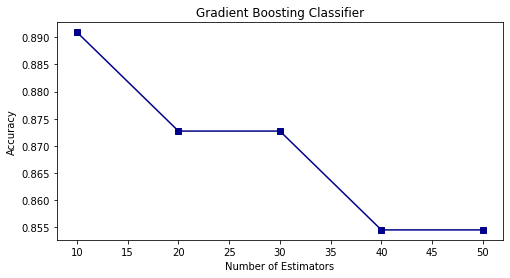

In [174]:
#Gradient Boost (Classifier)
# training the Gradient Boost
results = [] # empty list for appending accuracy results
n_estimator_options = [10, 20, 30, 40, 50] # list for number of estimator options
for est in n_estimator_options:
    model = GradientBoostingClassifier(n_estimators=est, random_state= 101) # model loops through the options for number of estimators hyperparameter
    model.fit(X_train, y_train) #fitting data
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test == y_pred) #accuracy calculation
    results.append(accuracy)
    auc_score = roc_auc_score(y_test, y_pred) #AUC calculation
    print("Accuracy", est, ":", accuracy)
    print("AUC   ", est, ":", auc_score) #printing AUC and Accuracy calculations for the different numbers of estimators

plt.figure(figsize = (8,4))
pd.Series(results, n_estimator_options).plot(color='darkblue', marker = 's')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy") # plotting accuracy against number of estimators
plt.title("Gradient Boosting Classifier")
plt.show() # The most accurate model is 89% accurate with a number of estimators of 10

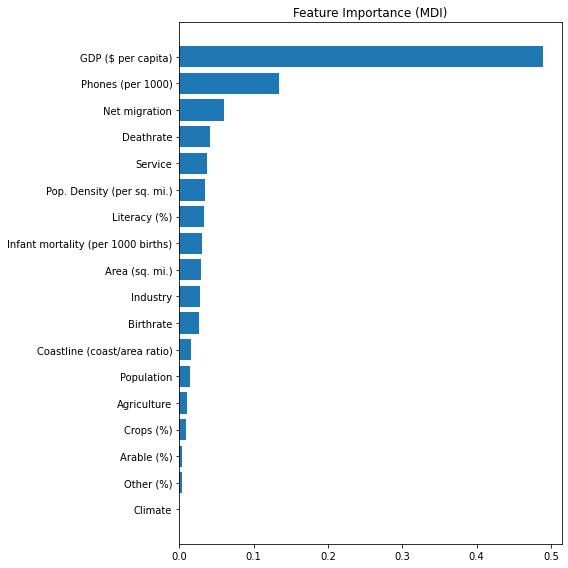

In [175]:
# This is going to show the feature importances for the Classifier model
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = model.feature_importances_ #Finds feature importances scores
sorted_idx = np.argsort(feature_importance) #Sorting feature importance
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center') #creating horizontal bar chart
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show() # this model's most important features are GDP per capita and Phones per 1000
#This charting code can be re-used later if this is the final model

In [176]:
print(classification_report(y_test, y_pred)) 
#Classification report shows strong performance in all categories, possibly boost recall for countries with above average per cap emissions later

              precision    recall  f1-score   support

       False       0.85      0.95      0.90        37
        True       0.86      0.67      0.75        18

    accuracy                           0.85        55
   macro avg       0.86      0.81      0.82        55
weighted avg       0.85      0.85      0.85        55



R^2 20 : 0.5305257368436754
R^2 40 : 0.49378474030989444
R^2 60 : 0.48250590658492154
R^2 80 : 0.47637713976575113
R^2 100 : 0.47592051435107763


Text(0.5, 1.0, 'Gradient Boosting Regression')

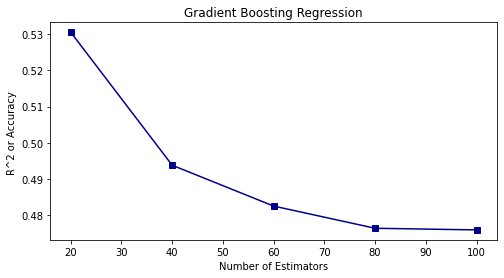

In [177]:
#Gradient Boost (Regression)   #Getting a r^2 of about 50% as maximum
# training the Gradient Boost
results = [] # empty list for appending accuracy results
n_estimator_options = [20, 40, 60, 80, 100] # list for number of estimator options
for est in n_estimator_options:
    model = GradientBoostingRegressor(n_estimators=est, learning_rate= .1,criterion= 'mse', random_state= 101) # model loops through the options for number of estimators hyperparameter
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rsq = model.score(X_test, y_test) #R^2 calculation / Accuracy calculation
    results.append(rsq)
    print("R^2", est, ":", rsq)

plt.figure(figsize = (8,4))
pd.Series(results, n_estimator_options).plot(color='darkblue', marker = 's')
plt.xlabel("Number of Estimators")
plt.ylabel("R^2 or Accuracy ") # plotting accuracy against number of estimators
plt.title("Gradient Boosting Regression") #Most effective model is 20 estimators
# R^2 peaks at 0.53 meaning only 53% of variance or change is explained, too low to be considered accaptable

In [178]:
# Re-trying but with a standard Scaler Code
# Source : https://vitalflux.com/gradient-boosting-regression-python-examples/ 
#Source also cited in the individual report

In [179]:
# Standardize the dataset
# This code should account for any scaling issues that may be weakening model
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) #re-fitting model to standard scaler
X_test_std = sc.transform(X_test)

In [180]:
# Hyperparameters for GradientBoostingRegressor to use with standard scaler
#
gbr_params = {'n_estimators': 25,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}

In [181]:
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)

In [182]:
# Fit the model
#
gbr.fit(X_train_std, y_train) #fitting model for predictions

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=25,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [183]:
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))  #Model accuracy about 50%
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse)) #model accuracy score, which is essentially same as R^2 is about 0.53
# This means the standard scaler does not make the regression more effective, this means I should suggest classifier as top model

Model Accuracy: 0.520
The mean squared error (MSE) on test set: 0.1056


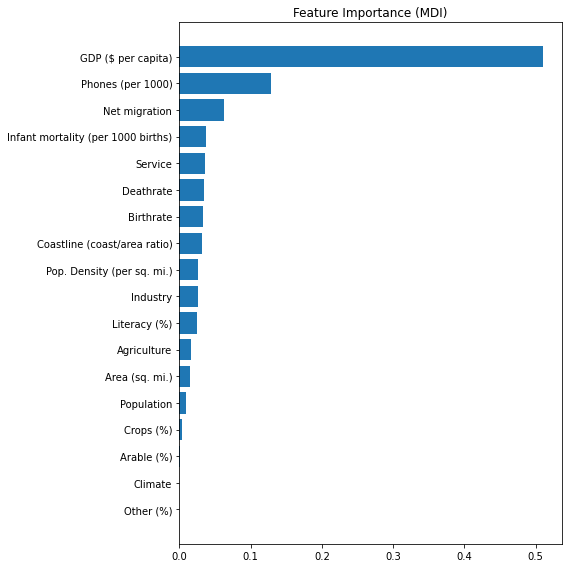

In [184]:
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_ #Finds feature importances scores
sorted_idx = np.argsort(feature_importance) #Sorting feature importance
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center') #creating horizontal bar chart
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show() # this model's most important features are GDP per capita and Phones per 1000
#Although chart is for a weak model, it can be adapted to later models

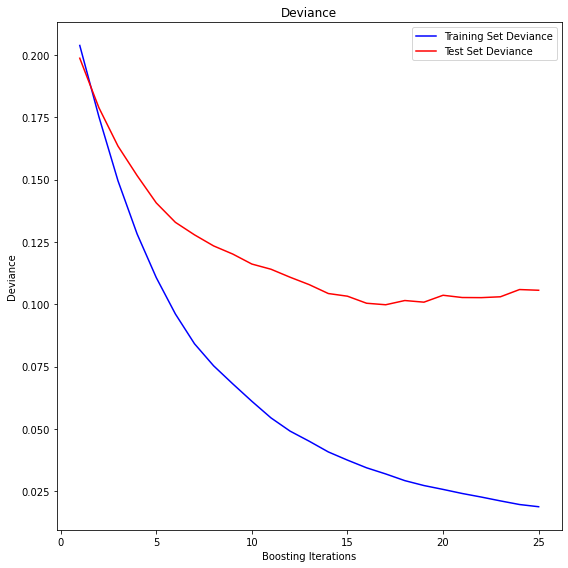

In [185]:
#This cell is charting the increasing in deviance as the number of estimators increases
test_score = np.zeros((gbr_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test_std)):
    test_score[i] = gbr.loss_(y_test, y_pred)
 
fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show() #this chart shows that our regression's predictive ability becomes weaker as the number of iterations increases
#This weakness is shown by the growing gap between training and test set deviances